In [1]:
from astropy.table import Table

In [3]:
cd ../Code

/Users/pauline/research_proj/m83_clustering/Code


In [4]:
alldat = Table.read('data_v4.txt',format='ascii.commented_header')

In [6]:
unclist = []

In [9]:
for coln in alldat.colnames:
    if 'mag05' in coln and '_unc' in coln:
        unclist.append(coln)

In [10]:
unclist

['mag05_225_unc',
 'mag05_336_unc',
 'mag05_373_unc',
 'mag05_438_unc',
 'mag05_487_unc',
 'mag05_502_unc',
 'mag05_555_unc',
 'mag05_657_unc',
 'mag05_673_unc',
 'mag05_814_unc']

In [11]:
msklist = []

In [67]:
# mask for good data
msklist = []
for i,unc in enumerate(unclist):
    msk = np.logical_and(alldat[photlist[i]]!=-99,np.logical_and(alldat[unc]<0.2, alldat[unc]>0))
    msklist.append(msk)

In [68]:
for i,m in enumerate(msklist):
    print(unclist[i],m.sum())

('mag05_225_unc', 15011)
('mag05_336_unc', 34129)
('mag05_373_unc', 8878)
('mag05_438_unc', 48858)
('mag05_487_unc', 13335)
('mag05_502_unc', 14654)
('mag05_555_unc', 65652)
('mag05_657_unc', 23939)
('mag05_673_unc', 25295)
('mag05_814_unc', 59600)


In [69]:
# combine the masks
cmask=np.column_stack(msklist).all(axis=1)

In [70]:
float(cmask.sum())/len(alldat)

0.09296634282260323

In [72]:
cmask.sum()

6306

In [32]:
alldat['mag05_555'][notallgood].mean()

27.098468207244085

In [73]:
# generate some more usefully named masks
allgood = cmask

In [74]:
notallgood = np.logical_not(cmask)
goodvi = np.logical_and(msklist[6],msklist[9])
goodub = np.logical_and(msklist[1],msklist[3])

In [33]:
%matplotlib inline

In [34]:
import matplotlib.pyplot as plt

(29, 18)

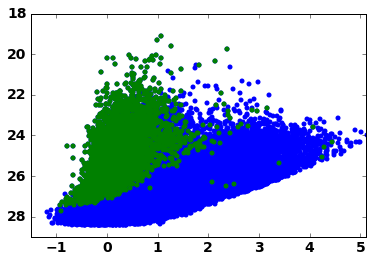

In [39]:
# compare the 'allgood' data to VI-good only
f,ax=plt.subplots()
ax.plot(alldat['mag05_555'][goodvi]-alldat['mag05_814'][goodvi],alldat['mag05_814'][goodvi],marker='.')
ax.plot(alldat['mag05_555'][allgood]-alldat['mag05_814'][allgood],alldat['mag05_814'][allgood],marker='.')
ax.set_xlim(-1.5,5.1)
ax.set_ylim(29,18)

(30, 18)

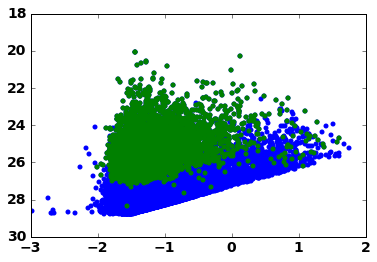

In [42]:
# compare the 'allgood' data to UB-good only
f,ax=plt.subplots()
ax.plot(alldat['mag05_336'][goodub]-alldat['mag05_438'][goodub],alldat['mag05_438'][goodub],marker='.')
ax.plot(alldat['mag05_336'][allgood]-alldat['mag05_438'][allgood],alldat['mag05_438'][allgood],marker='.')
ax.set_xlim(-3,2)
ax.set_ylim(30,18)

In [44]:
from sklearn.cluster import KMeans

In [45]:
# make a list of the photometry columns
photlist = []
for coln in alldat.colnames:
    if 'mag05' in coln and '_unc' not in coln:
        photlist.append(coln)

In [61]:
len(alldat)

67831

In [90]:
# generate list of magnitudes for good data
clust_dat = np.array([alldat[p][allgood] for p in photlist]).T

In [91]:
clust_dat.shape

(6306, 10)

In [92]:
#apply KM clustering
km = KMeans(4, init='random')
km.fit(clust_dat)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [93]:
labels = km.labels_

In [95]:
len(labels)

6306

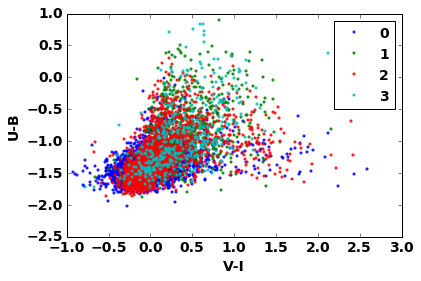

In [103]:
# plot the groups
f,ax = plt.subplots()
for i in range(0,4):
    ax.plot(clust_dat[labels==i,6]-clust_dat[labels==i,9],clust_dat[labels==i,1]-clust_dat[labels==i,3],
            label=i,marker='.',ms=2)
ax.legend()
ax.set_xlabel('V-I')
ax.set_ylabel('U-B')


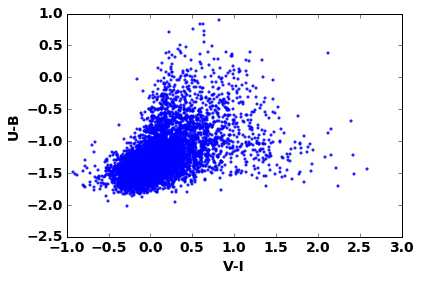

In [104]:
# compare to same dataset without groups - to see if the array generating business screwed things up. Looks OK.
f,ax = plt.subplots()
ax.plot(alldat['mag05_555'][allgood]-alldat['mag05_814'][allgood],
        alldat['mag05_336'][allgood]-alldat['mag05_438'][allgood],marker='.',ms=2)
ax.set_xlabel('V-I')
ax.set_ylabel('U-B')

In [105]:
cents = km.cluster_centers_

In [106]:
# cluster centres - looks like what we are getting is mostly segmentation by *brightness* not colour
cents

array([[ 24.90057776,  24.9311439 ,  25.25733285,  26.28801562,
         25.99730414,  26.30495422,  26.28931868,  25.18000218,
         26.23744695,  26.25404797],
       [ 23.82729081,  23.46542495,  23.61186023,  24.49539024,
         24.1060788 ,  24.40221107,  24.36911445,  23.4618743 ,
         24.17915385,  24.11114447],
       [ 24.32090762,  24.22728006,  24.50823607,  25.47935239,
         25.16517351,  25.45299658,  25.43750098,  24.59935728,
         25.33174829,  25.30909677],
       [ 22.54803167,  22.15883484,  22.24640498,  23.11211991,
         22.66822398,  22.96880769,  22.94581222,  21.89122172,
         22.71814706,  22.58412217]])

In [107]:
# generate list of colours for good data
plist = photlist[0:6]+photlist[7:]
col_dat = np.array([alldat[p][allgood]-alldat['mag05_555'][allgood] for p in plist]).T

In [109]:
col_dat

array([[-0.941, -1.067, -0.842, ..., -0.406, -0.127, -0.009],
       [-2.026, -1.534, -1.265, ..., -0.75 ,  0.109,  0.279],
       [-1.527, -1.336, -0.681, ..., -0.656,  0.26 ,  0.106],
       ..., 
       [-1.53 , -1.427, -1.163, ..., -1.225, -0.313,  0.06 ],
       [-1.266, -1.605, -1.079, ..., -0.634, -0.39 , -0.247],
       [ 0.974, -0.465, -0.444, ..., -0.432, -0.271, -0.318]])

In [110]:
km_new = KMeans(4, init='random')
km_new.fit(col_dat)
labels = km_new.labels_

(-2.5, 1.5)

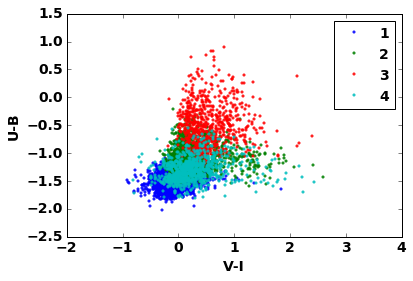

In [139]:
# plot the groups - can use old array for this
f,ax = plt.subplots()
for i in range(0,4):
    ax.plot(clust_dat[labels==i,6]-clust_dat[labels==i,9],clust_dat[labels==i,1]-clust_dat[labels==i,3],
            label=i+1,marker='.',ms=2)
ax.legend()
ax.set_xlabel('V-I')
ax.set_ylabel('U-B')
ax.set_xlim(-2,4)
ax.set_ylim(-2.5,1.5)

In [113]:
newcens = km_new.cluster_centers_
newcens

array([[-1.76528571, -1.53781356, -1.13193512, -0.06182241, -0.30216612,
        -0.00358028, -0.79802785,  0.0252228 ,  0.08476573],
       [-0.6280302 , -0.98445826, -0.77954885,  0.10949378, -0.21375015,
         0.04939432, -0.78820959, -0.15607401, -0.2624553 ],
       [ 0.85374571, -0.15129286, -0.27865286,  0.33217429, -0.15248714,
         0.08933   , -0.98457857, -0.37147857, -0.55704714],
       [-1.16646821, -1.22881387, -1.03039422,  0.07096532, -0.43227746,
        -0.0171711 , -2.01717457, -0.2492289 , -0.25448324]])

In [126]:
newcens[:,[2,4,5,6,7]]

array([[-1.13193512, -0.30216612, -0.00358028, -0.79802785,  0.0252228 ],
       [-0.77954885, -0.21375015,  0.04939432, -0.78820959, -0.15607401],
       [-0.27865286, -0.15248714,  0.08933   , -0.98457857, -0.37147857],
       [-1.03039422, -0.43227746, -0.0171711 , -2.01717457, -0.2492289 ]])

In [129]:
wave_all = np.array((225,336,373,438,487,502,657,673,814))
wave_narrow = np.array((373,487,502,657,673))
flux_cens = 10**(-0.4*(newcens))
flux_cens_narrow = 10**(-0.4*(newcens[:,[2,4,5,6,7]]))

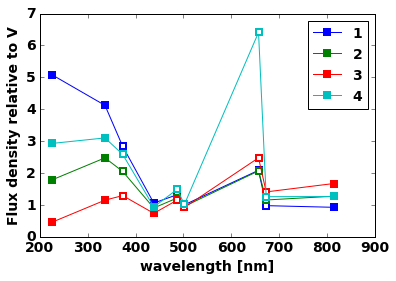

In [140]:
# plot the group centres as "SEDs"
f,ax = plt.subplots()
for i in range(0,4):
    ax.plot(wave_all,flux_cens[i],label=i+1,ms=8,ls="solid",mec="None")
    ax.plot(wave_narrow,flux_cens_narrow[i],ms=4,color="white",mec="None")
ax.legend()
ax.set_xlabel('wavelength [nm]')
ax.set_ylabel('Flux density relative to V')


In [138]:
for i in range(0,4):
    print(len(col_dat[labels==i]))

3052
1689
700
865
